In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline

In [3]:
def make_varyZ(Z):
    Min = pc.CloudyInput('../models/varyZ_{}'.format(Z))
    Min.set_BB(Teff=4e4, lumi_unit='Ionization parameter', lumi_value=-2)
    Min.set_cste_density(0)
    Min.set_stop(('zone = 1'))
    Min.set_emis_tab(('O  3 5006.84A', 'H  1 4861.36A'))
    Min.set_other(('metals {}'.format(Z), 
                   'set dr 0', 
                   'Cosmic Rays Background'))
    Min.print_input()

In [10]:
for Z in np.arange(-2, 1.1, 0.25):
    make_varyZ(Z)

In [11]:
pc.run_cloudy(dir_='../models', n_proc=4, use_make=True)

In [2]:
Ms = pc.load_models('../models/varyZ')
Ms = sorted(Ms, key=lambda x:x.abund['O'])

In [3]:
Ms[0].emis_labels

array(['O__3_500684A', 'H__1_486136A'], 
      dtype='<U12')

In [5]:
O3Hb = [M.get_emis_vol('O__3_500684A') / M.get_emis_vol('H__1_486136A') for M in Ms]
OH = [M.abund['O'] for M in Ms]

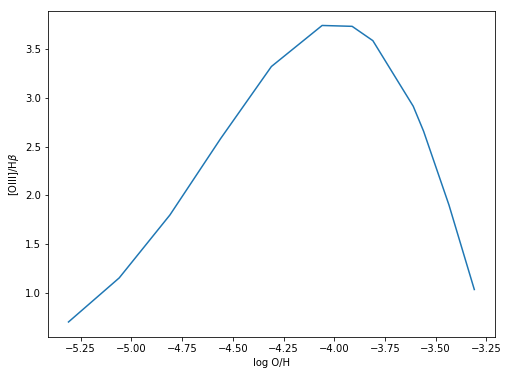

In [6]:
f, ax = plt.subplots(figsize=(8,6))
ax.plot(OH, O3Hb)
ax.set_xlabel('log O/H')
ax.set_ylabel(r'[OIII]/H$\beta$');

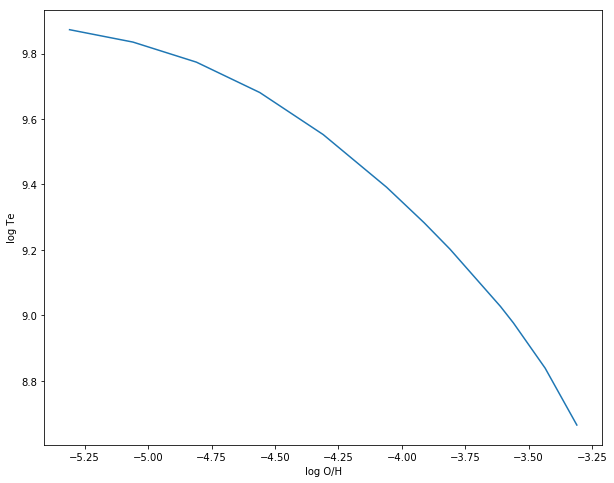

In [31]:
T0 = [M.T0 for M in Ms]
f, ax = plt.subplots(figsize=(10,8))
ax.plot(OH, np.log(T0))
ax.set_xlabel('log O/H')
ax.set_ylabel('log Te');